In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
filename='fulldataset_v28-10-2023.csv'
dataset=pd.read_csv(filename)

In [3]:
dataset.shape

(6099, 64)

In [4]:
dataset.describe()

,talk_id,view_counts,duration_in_seconds,video_type_id,topic_0_id,topic_1_id,topic_2_id,topic_3_id,topic_4_id,topic_5_id,topic_6_id,topic_7_id,related_talk_0_id,related_talk_1_id,related_talk_2_id,related_talk_3_id,related_talk_4_id,related_talk_5_id
count,6099.000000,6.099000e+03,6099.000000,6099.000000,6099.000000,6080.000000,5946.000000,5471.000000,4816.000000,3896.000000,3063.000000,2224.000000,6094.000000,6089.000000,6068.000000,5099.000000,5098.000000,5097.000000
mean,31922.899000,2.170442e+06,705.598951,2.131005,23.396622,60.454276,150.612344,252.375251,417.820390,607.200462,750.905322,872.768885,21039.839678,21078.973559,20677.036585,9132.671308,9589.487250,9797.675103
std,35786.142263,3.800615e+06,524.620001,1.551051,31.346882,144.599024,529.905398,759.366644,1090.406153,1380.353942,1541.386511,1658.387048,30064.743170,29818.939827,29176.865919,13672.886362,13920.517765,14055.937641
min,1.000000,4.540000e+02,60.000000,1.000000,3.000000,4.000000,5.000000,6.000000,8.000000,9.000000,10.000000,15.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000
25%,1766.500000,6.986540e+05,349.000000,1.000000,6.000000,13.000000,44.000000,62.000000,81.000000,105.000000,148.000000,175.000000,1004.000000,1085.000000,1193.000000,1052.000000,1155.250000,1169.000000
50%,16985.000000,1.422268e+06,674.000000,1.000000,8.000000,51.500000,71.000000,100.000000,165.000000,212.000000,246.000000,273.000000,2533.000000,2558.000000,2586.000000,1930.000000,2052.000000,2066.000000
75%,62743.000000,2.203588e+06,917.000000,3.000000,37.000000,72.000000,133.000000,206.000000,273.000000,341.000000,424.500000,525.000000,31587.500000,30821.000000,30813.000000,13247.000000,17849.500000,19413.000000
max,118894.000000,7.574498e+07,20404.000000,9.000000,294.000000,5800.000000,6394.000000,6865.000000,7089.000000,7188.000000,7188.000000,7188.000000,118136.000000,117687.000000,117489.000000,49424.000000,49424.000000,49424.000000


In [5]:
pd.set_option('display.max_rows', dataset.shape[0]+1)
dataset.loc[0]

mongodb_id                                          652af294d95841780141bab7
has_preview                                                            False
shortened_url                                        https://go.ted.com/6Ryx
comments_enabled                                                       False
comments_logged_in_only                                                False
talk_id                                                                 2147
talk_slug                  aakash_odedra_a_dance_in_a_hurricane_of_paper_...
talk_title                   A dance in a hurricane of paper, wind and light
talk_social_title            A dance in a hurricane of paper, wind and light
speakers_name                                                  Aakash Odedra
recorded_on                                                       2014-10-21
curator_approved                                                        True
view_counts                                                           950322

### Filtering the dataset to transcripts in 'English'

In [6]:
dataset[dataset['transcript_language']=='English'].shape

(4959, 64)

In [8]:
datasetEng=dataset[dataset['transcript_language']=='English'].reset_index()

datasetEng.to_csv('..\DatasetEnglish.csv', index=False)

### Exploring the distribution by topic, duration & across time

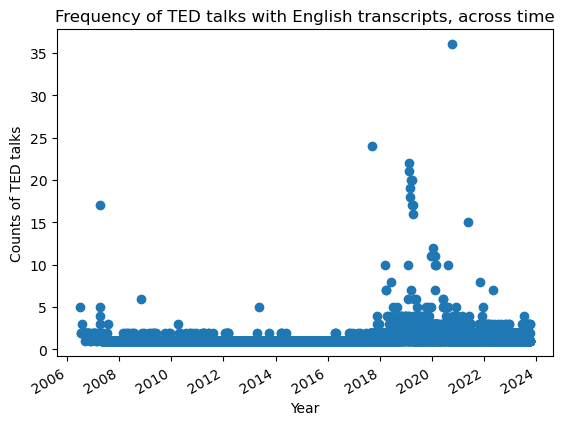

In [9]:
datasetEng['published_date']=pd.to_datetime(datasetEng['published_timestamp']).dt.date

y=datasetEng['published_date'].value_counts(sort=False)
y.index=pd.to_datetime(y.index)

fig, ax = plt.subplots()
ax.plot_date(y.index,y.values)
ax.set(title = "Frequency of TED talks with English transcripts, across time",
       xlabel = "Year",
       ylabel = "Counts of TED talks")
fig.autofmt_xdate()
plt.show()

<Axes: title={'center': 'Frequency of main topics (over 10 counts)'}, xlabel='Topic', ylabel='Counts'>

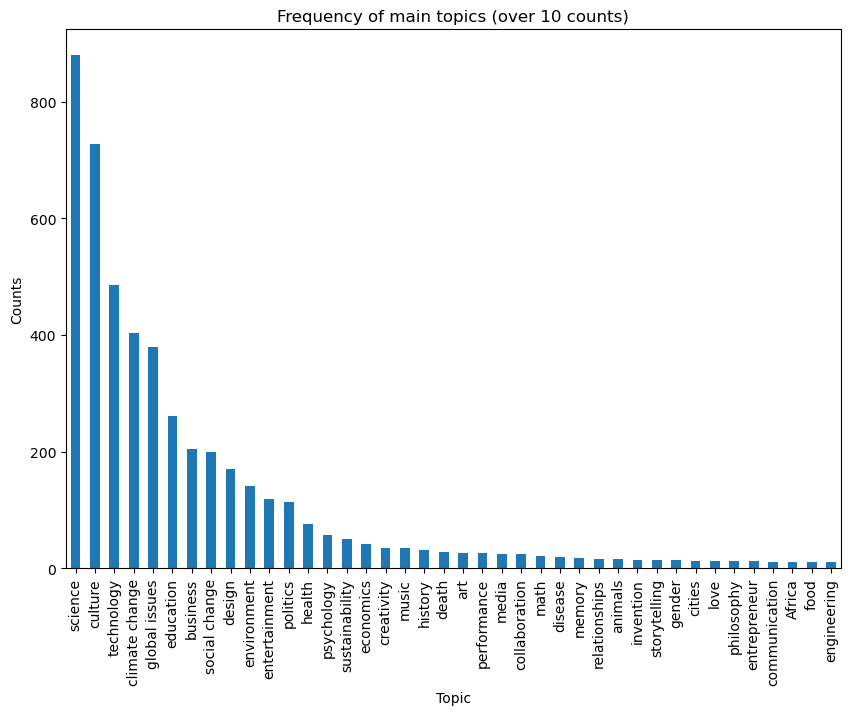

In [10]:
topic0=datasetEng['topic_0_name'].value_counts()
fig=plt.subplots(figsize =(10, 7))
topic0[topic0.values>10].plot(kind='bar', xlabel="Topic", ylabel="Counts",title="Frequency of main topics (over 10 counts)")

<Axes: title={'center': 'Frequency of main topics (under 10 counts)'}, xlabel='Topic', ylabel='Counts'>

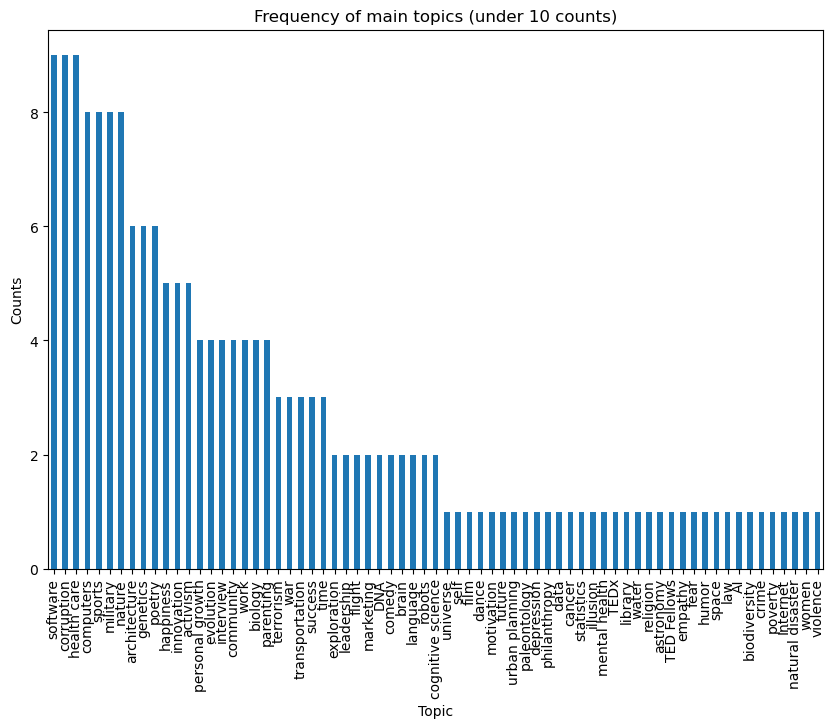

In [11]:
fig=plt.subplots(figsize =(10, 7))
topic0[topic0.values<=10].plot(kind='bar', xlabel="Topic", ylabel="Counts",title="Frequency of main topics (under 10 counts)")

<Figure size 4000x3000 with 0 Axes>

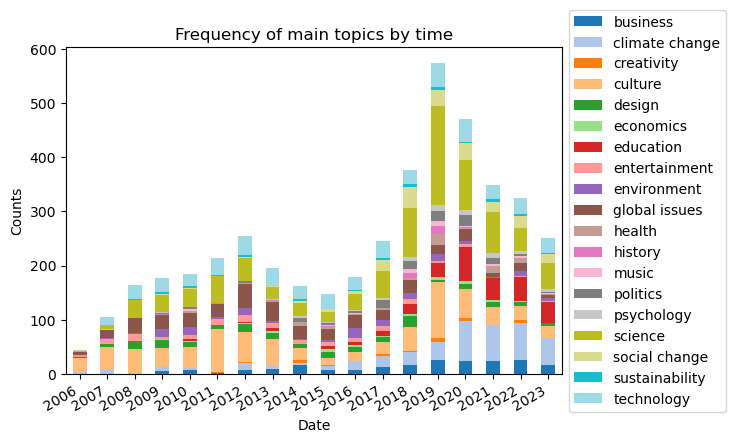

In [98]:
import matplotlib.ticker as ticker #I will use tickers to cluster months for readability

datasetEng['published_year']=pd.to_datetime(datasetEng['published_timestamp']).dt.year
time_topic=datasetEng[['published_year', 'topic_0_name']].loc[datasetEng['topic_0_name'].isin(topic0[topic0.values>30].index.to_list())].value_counts(sort=False).unstack()
plt.figure(figsize=(40, 30)) 
ax = time_topic.plot(kind='bar',stacked=True, colormap='tab20')
ax.set_xlabel("Date") 
ax.set_ylabel("Counts") 
ax.set_title("Frequency of main topics by time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().autofmt_xdate()

plt.show()


In [18]:
#topic0.index.to_list()
science=['science', 'technology', 'invention', 'math', 'engineering', 'software', 'computers', 'innovation', 'statistics', 'data', 'AI','robots', 'future','space', 'Internet',
        'astronomy']
culture=['culture', 'creativity', 'music', 'art', 'philosophy','performance', 'poetry', 'architecture','dance','film', 'comedy', 'history', 'language', 'paleontology',  
         'urban planning','entertainment']
social=['global issues','social change','politics', 'corruption','military', 'terrorism', 'crime','poverty', 'war','depression','philanthropy', 'religion','violence', 'women', 
        'gender', 'Africa', 'activism']
health=['health', 'disease', 'health care', 'genetics', 'DNA', 'brain', 'mental health', 'cancer', 'cognitive science', 'memory', 'death']
business=['cities', 'business', 'entrepreneur', 'economics', 'marketing', 'leadership', 'success', 'interview','work', 'law']
nature=['climate change', 'environment', 'sustainability', 'animals', 'nature', 'natural disaster', 'biodiversity', 'biology', 'water', 'evolution']
education =['education','psychology', 'relationships', 'communication', 'storytelling', 'collaboration', 'media', 'TED Fellows', 'motivation','parenting', 'community', 
            'personal growth', 'self', 'library']
other=['design',  'empathy', 'fear', 'humor',  'happiness', 'sports', 'flight', 'TEDx', 'love','food','transportation','time', 'exploration', 'universe', 'illusion']  

In [23]:
def plot_topic(lista, type_topic):
    datasetEng['published_year']=pd.to_datetime(datasetEng['published_timestamp']).dt.year
    time_topic=datasetEng[['published_year', 'topic_0_name']].loc[datasetEng['topic_0_name'].isin(lista)].value_counts(sort=False).unstack()
    plt.figure(figsize=(40, 30)) 
    ax = time_topic.plot(kind='bar',stacked=True, colormap='tab20')
    ax.set_xlabel("Date") 
    ax.set_ylabel("Counts") 
    ax.set_title(f"Frequency of main {type_topic} topics by time")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gcf().autofmt_xdate()
    plt.show()

<Figure size 4000x3000 with 0 Axes>

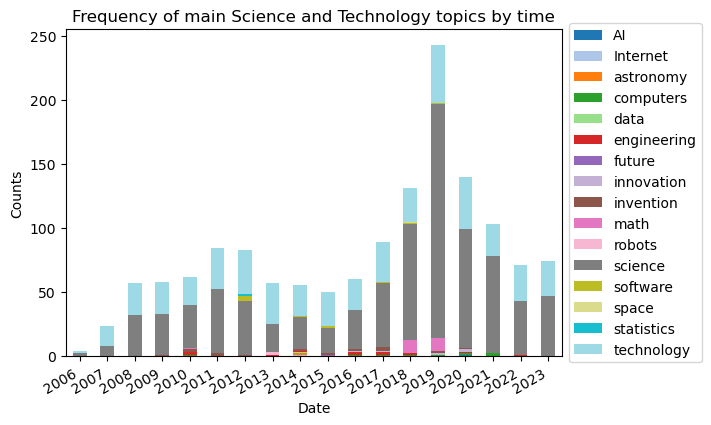

In [25]:
plot_topic(science, 'Science and Technology')

<Figure size 4000x3000 with 0 Axes>

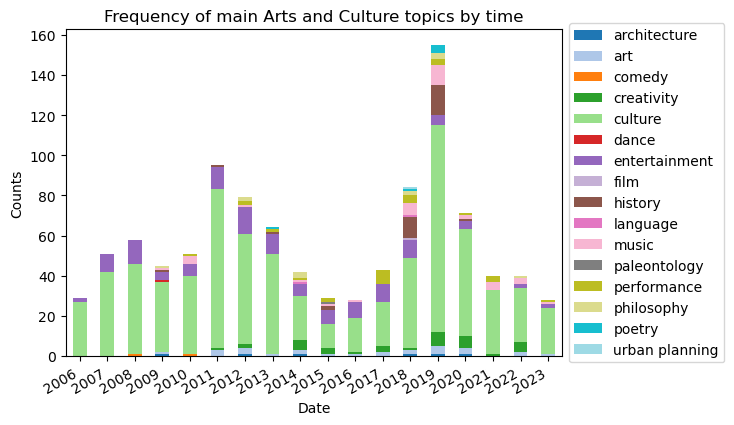

In [26]:
plot_topic(culture, 'Arts and Culture')

<Figure size 4000x3000 with 0 Axes>

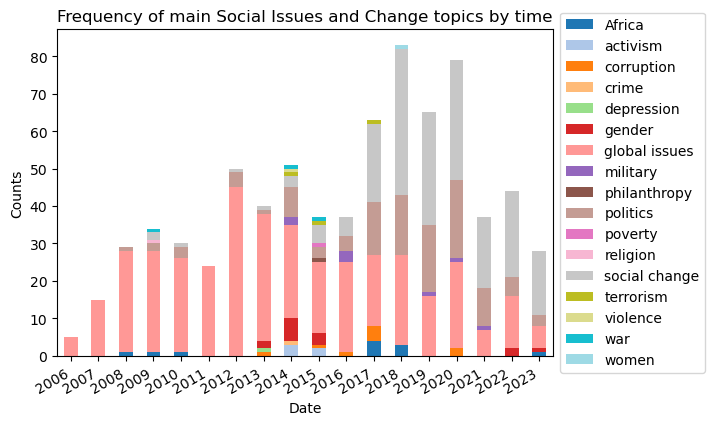

In [27]:
plot_topic(social, 'Social Issues and Change')

<Figure size 4000x3000 with 0 Axes>

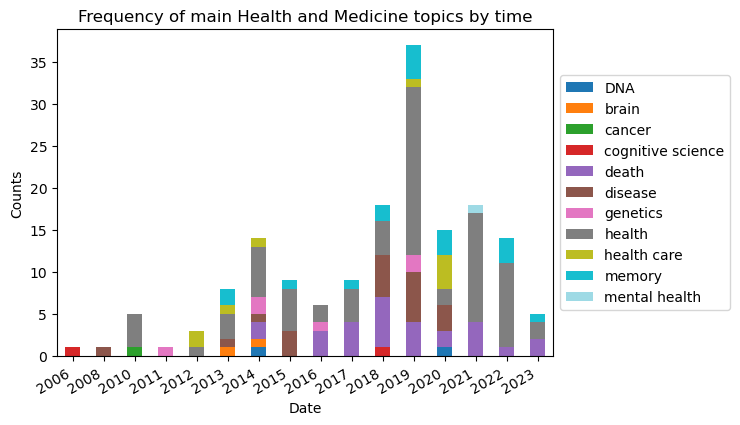

In [28]:
plot_topic(health, 'Health and Medicine')

<Figure size 4000x3000 with 0 Axes>

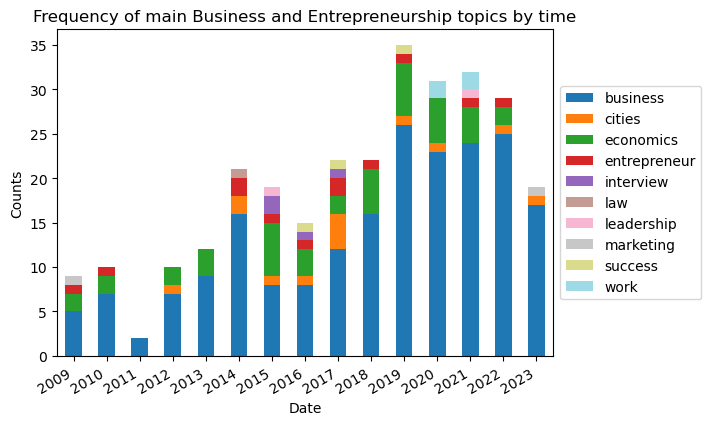

In [29]:
plot_topic(business, 'Business and Entrepreneurship')

<Figure size 4000x3000 with 0 Axes>

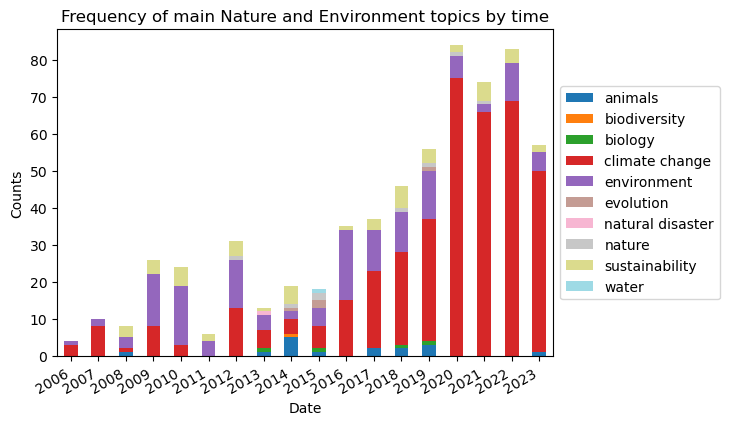

In [30]:
plot_topic(nature, 'Nature and Environment')

<Figure size 4000x3000 with 0 Axes>

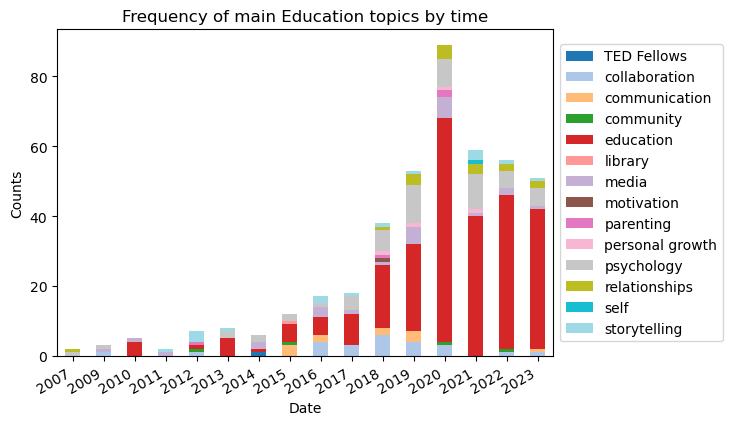

In [31]:
plot_topic(education, 'Education')

<Figure size 4000x3000 with 0 Axes>

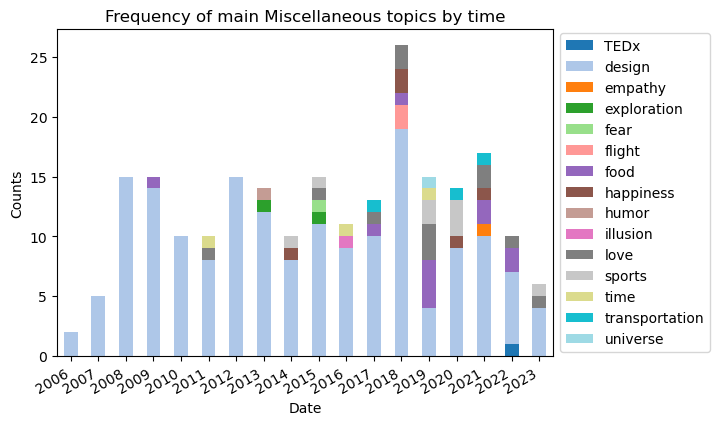

In [32]:
plot_topic(other, 'Miscellaneous')

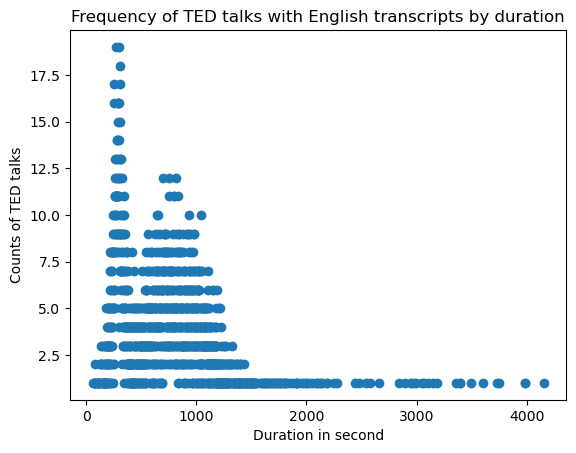

In [46]:
y=datasetEng['duration_in_seconds'].value_counts()
fig, ax = plt.subplots()
ax.scatter(y.index,y.values)
ax.set(title = "Frequency of TED talks with English transcripts by duration",xlabel = "Duration in second",ylabel = "Counts of TED talks")
plt.show()

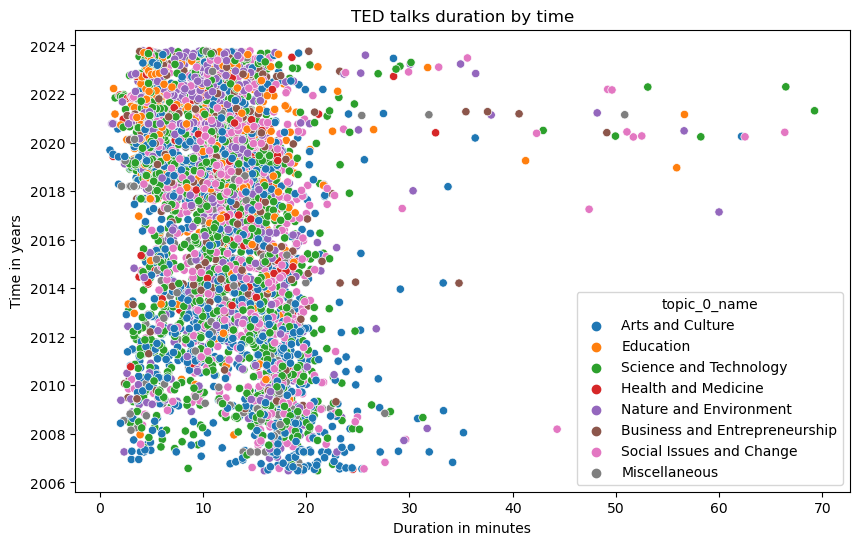

In [109]:
import seaborn as sns
x=datasetEng['duration_in_seconds']/60
h=datasetEng['topic_0_name'].apply(lambda x: 'Science and Technology' if x in science else ('Arts and Culture' if x in culture else 
                                                                                            ('Social Issues and Change' if x in social else 
                                                                                             ('Health and Medicine' if x in health else 
                                                                                              ('Business and Entrepreneurship' if x in business else 
                                                                                               ('Nature and Environment' if x in nature else 
                                                                                                ('Education' if x in education else 
                                                                                                 ('Miscellaneous' if x in other else 'other'))))))))

plt.figure(figsize=(10, 6))
ax=sns.scatterplot(x=x, y=datasetEng['published_date'], hue=h)
ax.set(title = "TED talks duration by time",xlabel = "Duration in minutes",ylabel = "Time in years")
ax.invert_yaxis()
plt.show()

In [125]:
plot_data=datasetEng[['duration_in_seconds','published_date','topic_0_name']].copy()
plot_data['duration_in_minutes']=plot_data['duration_in_seconds']/60
plot_data['topics']=plot_data['topic_0_name'].apply(lambda x: 'Science and Technology' if x in science else ('Arts and Culture' if x in culture else 
                                                                                            ('Social Issues and Change' if x in social else 
                                                                                             ('Health and Medicine' if x in health else 
                                                                                              ('Business and Entrepreneurship' if x in business else 
                                                                                               ('Nature and Environment' if x in nature else 
                                                                                                ('Education' if x in education else 
                                                                                                 ('Miscellaneous' if x in other else 'other'))))))))
#plot_data=plot_data.drop(['topic_0_name', 'duration_in_seconds'], axis=1)

plot_data['year'] = pd.to_datetime(plot_data['published_date']).dt.year

# Group by 'topics' and 'year', calculate mean duration and get counts
grouped_data = plot_data.groupby(['topics', 'year']).agg({'duration_in_minutes': 'mean'}).rename(columns={'duration_in_minutes': 'mean_duration_in_minutes'})

# Calculate counts of each group
grouped_data['counts'] = plot_data.groupby(['topics', 'year']).size()

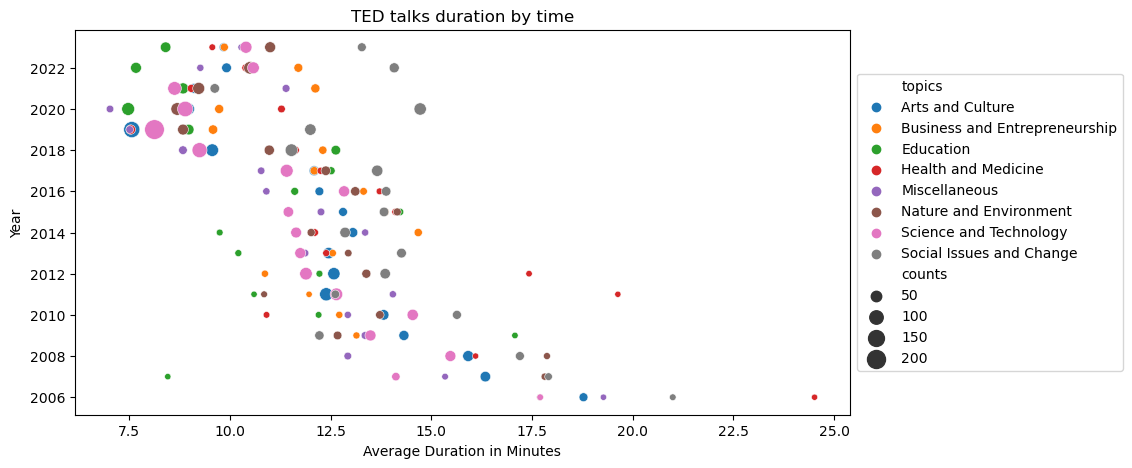

In [139]:
grouped_data.reset_index(drop=True,inplace=True)
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x='mean_duration_in_minutes', y='year', hue='topics', size='counts', sizes=(20, 200), data=grouped_data)
ax.set(title = "TED talks duration by time", xlabel = "Average Duration in Minutes", ylabel = "Year")
#ax.invert_yaxis()
sns.color_palette("rocket", as_cmap=True)
grouped_data['year'] = grouped_data['year'].astype(int)
years = range(min(grouped_data['year']), max(grouped_data['year'])+1, 2)

ax.set_yticks(years)
ax.set_yticklabels(years)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()